<a href="https://colab.research.google.com/github/aditithakore/Sentiment-analysis-ML/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# installing kaggle
! pip install kaggle

# config the path of kaggle.json
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Import dataset

In [ ]:
# fetch using API
! kaggle datasets download -d abhi8923shriv/sentiment-analysis-dataset

 94% 51.0M/54.4M [00:00<00:00, 174MB/s]
100% 54.4M/54.4M [00:00<00:00, 171MB/s]


In [ ]:
# extracting compressed dataset
from zipfile import ZipFile
dataset = '/content/sentiment-analysis-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Extraction successful')

Extraction successful


In [ ]:
  # importing dependencies
  import numpy as np
  import pandas as pd
  import re
  import matplotlib.pyplot as plt
  from nltk.corpus import stopwords
  from nltk.stem.porter import PorterStemmer
  from sklearn.feature_extraction.text import TfidfVectorizer
  from sklearn.model_selection import train_test_split
  from sklearn.svm import LinearSVC
  from sklearn.naive_bayes import MultinomialNB
  from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# printing stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data processing

In [ ]:
# loading data from csvfile to pandas
data=pd.read_csv('/content/test.csv', encoding= 'ISO-8859-1')

In [ ]:
# checking the numver of rows and cols
data.shape

(4815, 9)

In [ ]:
# printing first 5 rows
data.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [ ]:
# counting the missing values
data.isnull().sum()

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

In [ ]:
# replacing  null
default_value = 'neutral'
data.fillna(default_value, inplace=True)
# data['sentiment'] = data['sentiment'].replace('unknown', 'neutral')
# if 'unknown' in data['sentiment'].unique():
    # Replace 'unknown' with 'neutral'
# data.loc[data['sentiment'] == 'Unknown', 'sentiment'] = 'neutral'
# else:
    # print("The 'unknown' value is not present in the 'sentiment' column.")

In [ ]:
data.isnull().sum()

textID              0
text                0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

Text(0, 0.5, 'Count')

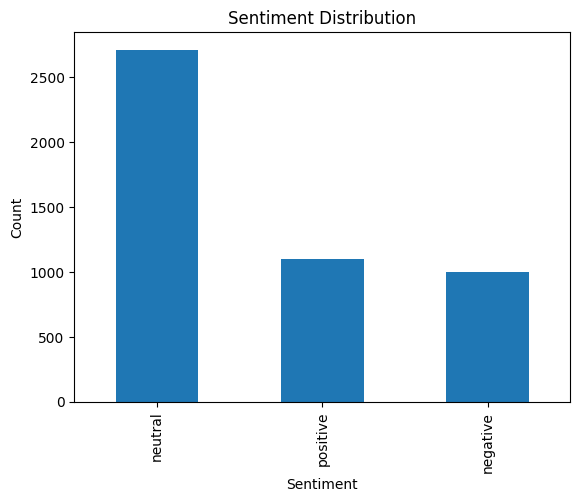

In [ ]:
# checking distribution
# data['sentiment'].value_counts()
# Visualize sentiment distribution
data['sentiment']. value_counts() . plot (kind= 'bar' )
plt.title("Sentiment Distribution" )
plt. xlabel( "Sentiment")
plt. ylabel( "Count" )

Stemming

process of reducing a word to its Rootword

In [ ]:
port_stem = PorterStemmer()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# stemming func
def stemming(content):
  stemmed_content =re.sub('[^a-zA-Z]',' ',content)
  stemmed_content =stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)

  return stemmed_content

In [ ]:
data['stemmed_content']= data['text'].apply(stemming)

In [ ]:
data.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),stemmed_content
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,last session day http twitpic com ezh
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,shanghai also realli excit precis skyscrap gal...
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,recess hit veroniqu branquinho quit compani shame
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,happi bday
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,http twitpic com w p like


In [ ]:
print(data['sentiment'])

0        neutral
1       positive
2       negative
3       positive
4       positive
          ...   
4810     neutral
4811     neutral
4812     neutral
4813     neutral
4814     neutral
Name: sentiment, Length: 4815, dtype: object


In [ ]:
# seprating the data and lable
X= data['stemmed_content'].values
Y= data['sentiment'].values

In [ ]:
print(Y)

['neutral' 'positive' 'negative' ... 'neutral' 'neutral' 'neutral']


In [ ]:
# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['sentiment'], test_size=0.2, random_state=42)

In [ ]:
# convert text to numerical data
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
# define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': LinearSVC(),
    'Naive Bayes': MultinomialNB()
}

In [ ]:
# train and evaluate the model
for name, model in models.items():
    model.fit(X_train_vectorized, y_train)
    y_pred = model.predict(X_test_vectorized)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.3f}')

Logistic Regression Accuracy: 0.720
Support Vector Machine Accuracy: 0.719
Naive Bayes Accuracy: 0.629


In [ ]:
# Get custom input from the user
custom_input = input("Enter a text to analyze: ")

# Preprocess and vectorize the custom input
custom_input_vectorized = vectorizer.transform([custom_input])

# Predict the sentiment of the custom input
sentiment = model.predict(custom_input_vectorized)
print(f'Predicted sentiment: {sentiment[0]}')

Enter a text to analyze: hello im happy
Predicted sentiment: positive
